In [39]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression
from scipy import stats
df = pd.read_csv('data_month_ebill_cleaned.csv')
df.loc[26,'Units_kWh']=358912
df.loc[24,'Units_kWh']=378448

,Standardized_Date,RAW WATER FLOW IN ML,CLEAR WATER SUMP LEVEL IN Meter,CLEAR WATER PUMPING FLOW ML,TREATED WATER PRODUCTION IN ML,remarks category,Avg_Consumption (kWh),Energy Charge,Units_kWh,Year,Month,Month-Year
0,2021-12-31,1998.059680,2.900954,1738.985111,1933.722260,['No remarks'],264227.0,1802752.40,284352.0,2021,12,12-2021
1,2022-01-31,1928.276850,2.713804,1669.968356,1866.186420,['No remarks' 'WTP cleaning' 'energy auditing'...,270707.0,1814811.00,278984.0,2022,1,01-2022
2,2022-02-28,1832.749031,2.800164,1577.522110,1773.731660,['No remarks' 'maintanance at intake' 'Power F...,272721.0,1729563.80,271048.0,2022,2,02-2022
3,2022-03-31,2169.405400,2.831720,1860.290835,2099.551520,['No remarks' 'Power Failure at Intake'],277393.0,1888178.05,298664.0,2022,3,03-2022
4,2022-04-30,1943.862463,2.769444,1699.233060,1881.272590,['No remarks' 'Power Failure at Intake' 'Power...,281749.0,1890310.40,299392.0,2022,4,04-2022
5,2022-05-31,2016.614410,2.857272,1757.840880,1951.698500,['No remarks' 'Power Failure at WTP' 'Power Fa...,282532.0,1681677.40,262752.0,2022,5,05-2022
6,2022-06-30,1814.876370,2.691806,1606.903240,1756.432580,['No remarks' 'Power Failure at intake and WTP...,242923.0,1670442.48,256808.0,2022,6,06-2022
7,2022-07-31,1599.658680,2.793535,1404.362230,1548.147830,['No remarks' 'intake sump level low' 'Power F...,234395.0,1586531.05,227816.0,2022,7,07-2022
8,2022-08-31,1752.933070,2.840269,1520.865680,1696.487150,['No remarks' 'Power Failure at intake and WTP...,230045.0,1683641.02,244952.0,2022,8,08-2022
9,2022-09-30,1910.059020,2.836417,1669.906550,1848.543760,['No remarks' 'intake cleaning'],225967.0,1865490.92,274192.0,2022,9,09-2022


In [40]:
# df.loc[26,'Units_kWh']=358912
# df.loc[24,'Units_kWh']=378448

In [41]:
df['No:of_pumps']=(df['CLEAR WATER PUMPING FLOW ML']/0.932).round()
df.columns

Index(['Standardized_Date', 'RAW WATER FLOW IN ML',
       'CLEAR WATER SUMP LEVEL IN Meter', 'CLEAR WATER PUMPING FLOW ML',
       'TREATED WATER PRODUCTION IN ML', 'remarks category',
       'Avg_Consumption (kWh)', 'Energy Charge', 'Units_kWh', 'Year', 'Month',
       'Month-Year', 'No:of_pumps'],
      dtype='object')

In [42]:
corr_units_pumps = df['Units_kWh'].corr(df['No:of_pumps'])
corr_units_clear_water = df['Units_kWh'].corr(df['CLEAR WATER PUMPING FLOW ML'])
corr_units_pumps,corr_units_clear_water

(0.9612506560173206, 0.9613074552274661)

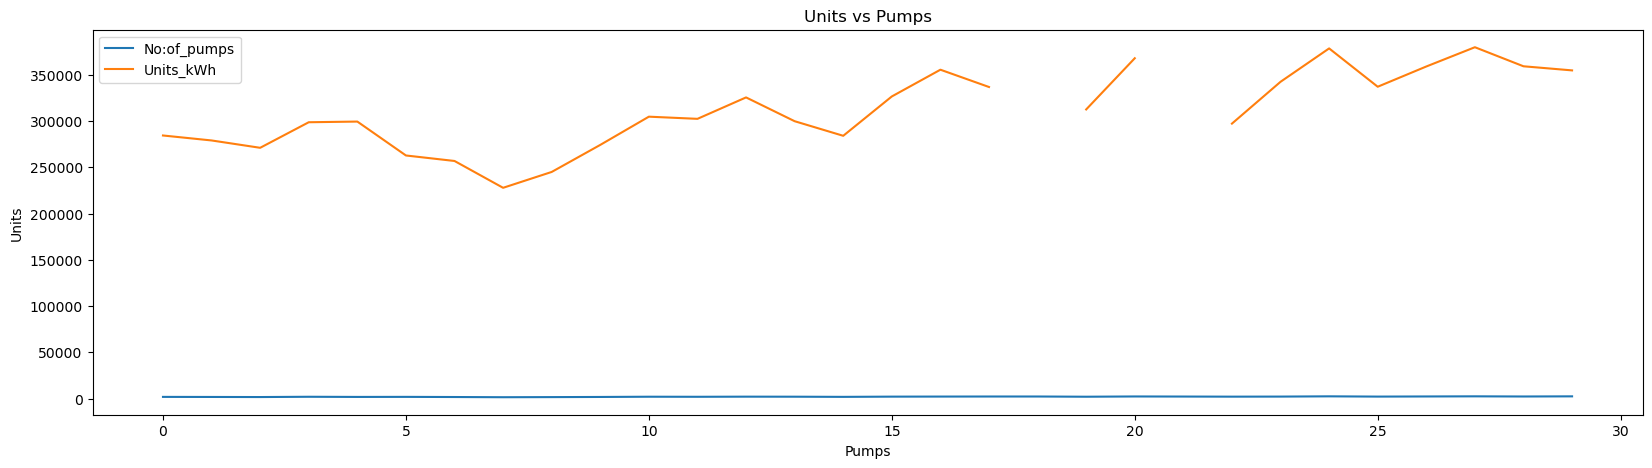

In [43]:
df[['No:of_pumps','Units_kWh']].plot(kind='line', figsize=(20, 5))
plt.title('Units vs Pumps')
plt.xlabel('Pumps')
plt.ylabel('Units')
plt.show()

In [44]:
df2 =df.dropna().reset_index(drop=True)
df2

,Standardized_Date,RAW WATER FLOW IN ML,CLEAR WATER SUMP LEVEL IN Meter,CLEAR WATER PUMPING FLOW ML,TREATED WATER PRODUCTION IN ML,remarks category,Avg_Consumption (kWh),Energy Charge,Units_kWh,Year,Month,Month-Year,No:of_pumps
0,2021-12-31,1998.059680,2.900954,1738.985111,1933.722260,['No remarks'],264227.0,1802752.40,284352.0,2021,12,12-2021,1866.0
1,2022-01-31,1928.276850,2.713804,1669.968356,1866.186420,['No remarks' 'WTP cleaning' 'energy auditing'...,270707.0,1814811.00,278984.0,2022,1,01-2022,1792.0
2,2022-02-28,1832.749031,2.800164,1577.522110,1773.731660,['No remarks' 'maintanance at intake' 'Power F...,272721.0,1729563.80,271048.0,2022,2,02-2022,1693.0
3,2022-03-31,2169.405400,2.831720,1860.290835,2099.551520,['No remarks' 'Power Failure at Intake'],277393.0,1888178.05,298664.0,2022,3,03-2022,1996.0
4,2022-04-30,1943.862463,2.769444,1699.233060,1881.272590,['No remarks' 'Power Failure at Intake' 'Power...,281749.0,1890310.40,299392.0,2022,4,04-2022,1823.0
5,2022-05-31,2016.614410,2.857272,1757.840880,1951.698500,['No remarks' 'Power Failure at WTP' 'Power Fa...,282532.0,1681677.40,262752.0,2022,5,05-2022,1886.0
6,2022-06-30,1814.876370,2.691806,1606.903240,1756.432580,['No remarks' 'Power Failure at intake and WTP...,242923.0,1670442.48,256808.0,2022,6,06-2022,1724.0
7,2022-07-31,1599.658680,2.793535,1404.362230,1548.147830,['No remarks' 'intake sump level low' 'Power F...,234395.0,1586531.05,227816.0,2022,7,07-2022,1507.0
8,2022-08-31,1752.933070,2.840269,1520.865680,1696.487150,['No remarks' 'Power Failure at intake and WTP...,230045.0,1683641.02,244952.0,2022,8,08-2022,1632.0
9,2022-09-30,1910.059020,2.836417,1669.906550,1848.543760,['No remarks' 'intake cleaning'],225967.0,1865490.92,274192.0,2022,9,09-2022,1792.0


In [45]:
x_unit = df2['CLEAR WATER PUMPING FLOW ML']
y_unit = df2['Units_kWh']
slope_unit, intercept_unit, r_unit, p_unit, std_err_unit = stats.linregress(x_unit, y_unit)

def myfunc_unit(x_unit):
  return slope_unit * x_unit + intercept_unit

mymodel_unit = list(map(myfunc_unit, x_unit))


y1_unit = (slope_unit * (2121.064530) + intercept_unit).round()
y2_unit =(slope_unit * (2077.529360) + intercept_unit).round()
y1_unit,y2_unit

x_avg = df2['CLEAR WATER PUMPING FLOW ML']
y_avg = df2['Avg_Consumption (kWh)']
slope_avg, intercept_avg, r_avg, p_avg, std_err_avg = stats.linregress(x_avg, y_avg)

def myfunc_avg(x_avg):
  return slope_avg * x_avg + intercept_avg
mymodel_avg = list(map(myfunc_avg, x_avg))

y1_avg = (slope_avg * (2121.064530) + intercept_avg).round()
y2_avg =(slope_avg * (2077.529360) + intercept_avg).round()
y1_avg,y2_avg

x_charge = df2['CLEAR WATER PUMPING FLOW ML']
y_charge = df2['Energy Charge']
slope_charge, intercept_charge, r_charge, p_charge, std_err_charge = stats.linregress(x_charge, y_charge)

def myfunc_charge(x_charge):
  return slope_charge * x_charge + intercept_charge
mymodel_charge = list(map(myfunc_charge, x_charge))

y1_charge = (slope_charge * (2121.064530) + intercept_charge).round(2)
y2_charge =(slope_charge * (2077.529360) + intercept_charge).round(2)
y1_charge,y2_charge





print(f'Charge_June23 :{y1_charge}\n',
      f'Charge_Sept23 : {y2_charge}\n',
      f'Avg_consumption_June23 : {y1_avg}\n',
      f'Avg_consumption_Sept23 : {y2_avg}\n',
     f'Unit_June23 : {y1_unit}\n',
      f'Unit_Sept23 : {y2_unit}\n')

Charge_June23 :2472964.61
 Charge_Sept23 : 2409426.4
 Avg_consumption_June23 : 328432.0
 Avg_consumption_Sept23 : 321847.0
 Unit_June23 : 346766.0
 Unit_Sept23 : 339606.0



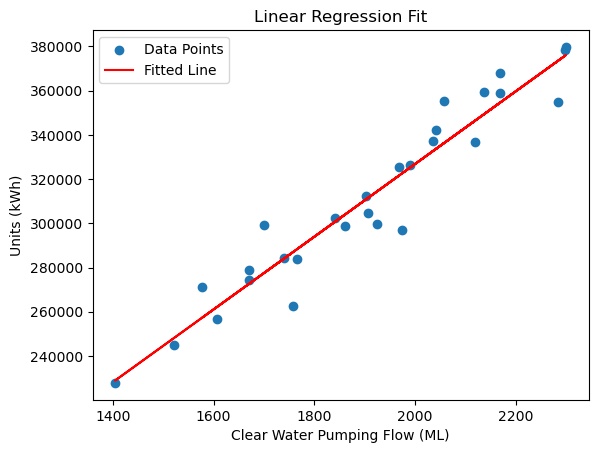

In [46]:
x_unit = df2['CLEAR WATER PUMPING FLOW ML']
y_unit = df2['Units_kWh']
slope_unit, intercept_unit, r_unit, p_unit, std_err_unit = stats.linregress(x_unit, y_unit)
plt.scatter(x_unit, y_unit, label='Data Points')
plt.plot(x_unit, mymodel_unit, color='red', label='Fitted Line')
plt.title('Linear Regression Fit')
plt.xlabel('Clear Water Pumping Flow (ML)')
plt.ylabel('Units (kWh)')
plt.legend()
plt.show()

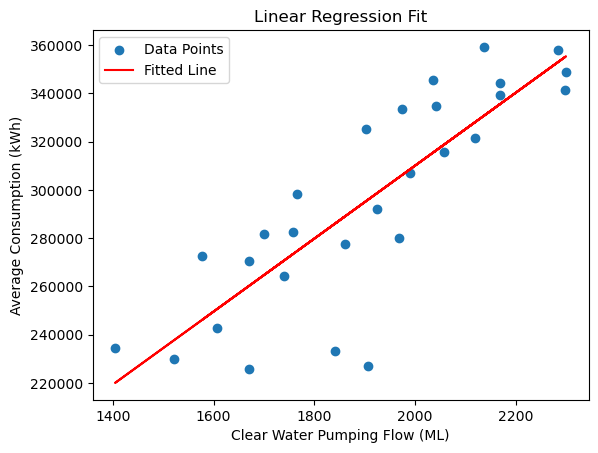

In [47]:
x_avg = df2['CLEAR WATER PUMPING FLOW ML']
y_avg = df2['Avg_Consumption (kWh)']
slope_avg, intercept_avg, r_avg, p_avg, std_err_avg = stats.linregress(x_avg, y_avg)

plt.scatter(x_avg, y_avg, label='Data Points')
plt.plot(x_avg, mymodel_avg, color='red', label='Fitted Line')
plt.title('Linear Regression Fit')
plt.xlabel('Clear Water Pumping Flow (ML)')
plt.ylabel('Average Consumption (kWh)')
plt.legend()
plt.show()

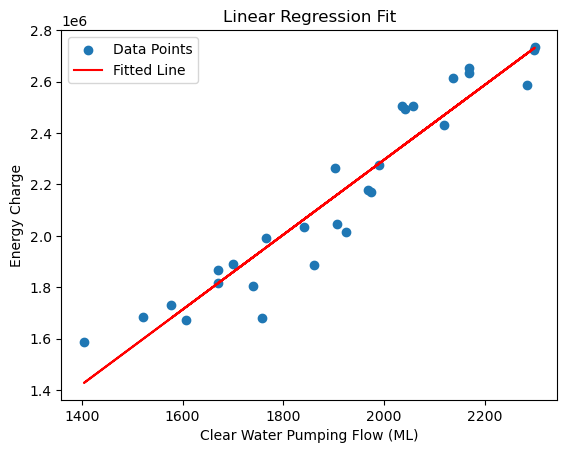

In [48]:
x_charge = df2['CLEAR WATER PUMPING FLOW ML']
y_charge = df2['Energy Charge']
slope_charge, intercept_charge, r_charge, p_charge, std_err_charge = stats.linregress(x_charge, y_charge)

plt.scatter(x_charge, y_charge, label='Data Points')
plt.plot(x_charge, mymodel_charge, color='red', label='Fitted Line')
plt.title('Linear Regression Fit')
plt.xlabel('Clear Water Pumping Flow (ML)')
plt.ylabel('Energy Charge')
plt.legend()
plt.show()

In [55]:
index_replace = [18,21]
colum_replace =['Avg_Consumption (kWh)','Energy Charge','Units_kWh']

df.loc[index_replace,colum_replace]= [[y1_avg, y1_charge, y1_unit], [y2_avg, y2_charge, y2_unit]]

df= df[['Standardized_Date', 'RAW WATER FLOW IN ML',
       'CLEAR WATER SUMP LEVEL IN Meter', 'CLEAR WATER PUMPING FLOW ML',
       'TREATED WATER PRODUCTION IN ML', 'remarks category',
       'Avg_Consumption (kWh)', 'Energy Charge', 'Units_kWh',
       'Year', 'Month',
       'Month-Year','No:of_pumps']]
df

,Standardized_Date,RAW WATER FLOW IN ML,CLEAR WATER SUMP LEVEL IN Meter,CLEAR WATER PUMPING FLOW ML,TREATED WATER PRODUCTION IN ML,remarks category,Avg_Consumption (kWh),Energy Charge,Units_kWh,Year,Month,Month-Year,No:of_pumps
0,2021-12-31,1998.059680,2.900954,1738.985111,1933.722260,['No remarks'],264227.0,1802752.40,284352.0,2021,12,12-2021,1866.0
1,2022-01-31,1928.276850,2.713804,1669.968356,1866.186420,['No remarks' 'WTP cleaning' 'energy auditing'...,270707.0,1814811.00,278984.0,2022,1,01-2022,1792.0
2,2022-02-28,1832.749031,2.800164,1577.522110,1773.731660,['No remarks' 'maintanance at intake' 'Power F...,272721.0,1729563.80,271048.0,2022,2,02-2022,1693.0
3,2022-03-31,2169.405400,2.831720,1860.290835,2099.551520,['No remarks' 'Power Failure at Intake'],277393.0,1888178.05,298664.0,2022,3,03-2022,1996.0
4,2022-04-30,1943.862463,2.769444,1699.233060,1881.272590,['No remarks' 'Power Failure at Intake' 'Power...,281749.0,1890310.40,299392.0,2022,4,04-2022,1823.0
5,2022-05-31,2016.614410,2.857272,1757.840880,1951.698500,['No remarks' 'Power Failure at WTP' 'Power Fa...,282532.0,1681677.40,262752.0,2022,5,05-2022,1886.0
6,2022-06-30,1814.876370,2.691806,1606.903240,1756.432580,['No remarks' 'Power Failure at intake and WTP...,242923.0,1670442.48,256808.0,2022,6,06-2022,1724.0
7,2022-07-31,1599.658680,2.793535,1404.362230,1548.147830,['No remarks' 'intake sump level low' 'Power F...,234395.0,1586531.05,227816.0,2022,7,07-2022,1507.0
8,2022-08-31,1752.933070,2.840269,1520.865680,1696.487150,['No remarks' 'Power Failure at intake and WTP...,230045.0,1683641.02,244952.0,2022,8,08-2022,1632.0
9,2022-09-30,1910.059020,2.836417,1669.906550,1848.543760,['No remarks' 'intake cleaning'],225967.0,1865490.92,274192.0,2022,9,09-2022,1792.0


In [ ]:
fig = px.line(df, y="CLEAR WATER PUMPING FLOW ML", x="Standardized_Date", title='Clear Water Pumping Flow Trend')

fig.show()
pyo.plot(fig, filename='Clear Water Pumping Flow Trend', auto_open=True)

In [ ]:
fig = px.line(df, y="Units_kWh", x="Standardized_Date", title='Units Consumed Trend')

fig.show()
pyo.plot(fig, filename='Clear Water Pumping Flow Trend', auto_open=True)

In [50]:
sorted_data = df.sort_values(by='No:of_pumps')
fig = px.line(sorted_data, x="No:of_pumps", y='Units_kWh', title='Units kWh vs No:of Pumps',hover_data=['Standardized_Date','No:of_pumps'])

fig.show()

In [51]:
fig = px.line(sorted_data,x="CLEAR WATER PUMPING FLOW ML", y="Units_kWh", title='Clear Water Pumping Flow vs Units kWh')#,hover_data='Standardized_Date')

fig.show()
pyo.plot(fig, filename='Clear Water Pumping Flow vs Units kWh.html', auto_open=True)

'Clear Water Pumping Flow vs Units kWh.html'

In [52]:
fig = px.scatter(sorted_data,x="CLEAR WATER PUMPING FLOW ML", y="Units_kWh", title='Clear Water Pumping Flow vs Units kWh')#,hover_data='Standardized_Date')

fig.show()
pyo.plot(fig, filename='Clear Water Pumping Flow vs Units kWh.html', auto_open=True)

'Clear Water Pumping Flow vs Units kWh.html'

In [53]:
fig = px.scatter(
    sorted_data,
    x="CLEAR WATER PUMPING FLOW ML",
    y="Units_kWh",
    title='Clear Water Pumping Flow vs Units kWh',
    #hover_data='Standardized_Date',
    trendline='ols'  #for trendline 
)
fig.update_traces(marker=dict(size=10, color='black'),selector=dict(mode='markers'))   # size and color of the dots
 

fig.update_traces(line=dict(color='red'),selector=dict(type='scatter', mode='lines'))  #trendline color to red
                  

fig.show()

pyo.plot(fig, filename='Clear Water Pumping Flow vs Units kWh.html', auto_open=True)

'Clear Water Pumping Flow vs Units kWh.html'

In [54]:
df[['Month-Year','Units_kWh']]

,Month-Year,Units_kWh
0,12-2021,284352.0
1,01-2022,278984.0
2,02-2022,271048.0
3,03-2022,298664.0
4,04-2022,299392.0
5,05-2022,262752.0
6,06-2022,256808.0
7,07-2022,227816.0
8,08-2022,244952.0
9,09-2022,274192.0


In [57]:
df['charge_per_unit'] = df['Energy Charge']/ df['Units_kWh']
## Specific energy consumption: amount of units taken to produce 1ML of treated water
df['specific_energy_consumption'] = (df['Units_kWh']/df['TREATED WATER PRODUCTION IN ML']).round(2)
## unit_cost: the cost for producing 1ML of treated water
df['unit_cost'] = (df['Energy Charge']/df['TREATED WATER PRODUCTION IN ML']).round(2)
df

,Standardized_Date,RAW WATER FLOW IN ML,CLEAR WATER SUMP LEVEL IN Meter,CLEAR WATER PUMPING FLOW ML,TREATED WATER PRODUCTION IN ML,remarks category,Avg_Consumption (kWh),Energy Charge,Units_kWh,Year,Month,Month-Year,No:of_pumps,charge_per_unit,specific_energy_consumption,unit_cost
0,2021-12-31,1998.059680,2.900954,1738.985111,1933.722260,['No remarks'],264227.0,1802752.40,284352.0,2021,12,12-2021,1866.0,6.339862,147.05,932.27
1,2022-01-31,1928.276850,2.713804,1669.968356,1866.186420,['No remarks' 'WTP cleaning' 'energy auditing'...,270707.0,1814811.00,278984.0,2022,1,01-2022,1792.0,6.505072,149.49,972.47
2,2022-02-28,1832.749031,2.800164,1577.522110,1773.731660,['No remarks' 'maintanance at intake' 'Power F...,272721.0,1729563.80,271048.0,2022,2,02-2022,1693.0,6.381024,152.81,975.10
3,2022-03-31,2169.405400,2.831720,1860.290835,2099.551520,['No remarks' 'Power Failure at Intake'],277393.0,1888178.05,298664.0,2022,3,03-2022,1996.0,6.322081,142.25,899.32
4,2022-04-30,1943.862463,2.769444,1699.233060,1881.272590,['No remarks' 'Power Failure at Intake' 'Power...,281749.0,1890310.40,299392.0,2022,4,04-2022,1823.0,6.313831,159.14,1004.80
5,2022-05-31,2016.614410,2.857272,1757.840880,1951.698500,['No remarks' 'Power Failure at WTP' 'Power Fa...,282532.0,1681677.40,262752.0,2022,5,05-2022,1886.0,6.400246,134.63,861.65
6,2022-06-30,1814.876370,2.691806,1606.903240,1756.432580,['No remarks' 'Power Failure at intake and WTP...,242923.0,1670442.48,256808.0,2022,6,06-2022,1724.0,6.504636,146.21,951.04
7,2022-07-31,1599.658680,2.793535,1404.362230,1548.147830,['No remarks' 'intake sump level low' 'Power F...,234395.0,1586531.05,227816.0,2022,7,07-2022,1507.0,6.964090,147.15,1024.79
8,2022-08-31,1752.933070,2.840269,1520.865680,1696.487150,['No remarks' 'Power Failure at intake and WTP...,230045.0,1683641.02,244952.0,2022,8,08-2022,1632.0,6.873351,144.39,992.43
9,2022-09-30,1910.059020,2.836417,1669.906550,1848.543760,['No remarks' 'intake cleaning'],225967.0,1865490.92,274192.0,2022,9,09-2022,1792.0,6.803594,148.33,1009.17


In [58]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

In [59]:
df[['Clear Water Pumping scale', 'Consumption scale']] = scaler.fit_transform(df[['CLEAR WATER PUMPING FLOW ML', 'Units_kWh']])

In [62]:
df_2022_2023 = df[(df['Year']==2022)|(df['Year']==2023)|(df['Year']==2024)]
fig = px.bar(df_2022_2023, x='Month-Year', y=['Consumption scale', 'Clear Water Pumping scale'], barmode='group') #title='Raw Water Pumped during various zones in ML')

fig.show()

In [61]:
sorted_data = df.sort_values(by='CLEAR WATER PUMPING FLOW ML')

fig = px.line(sorted_data, x="CLEAR WATER PUMPING FLOW ML", y="Units_kWh", hover_data=['Standardized_Date','RAW WATER FLOW IN ML'])
fig.show()